In [104]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

# 1. Model # 

Write a function representing a simple model.

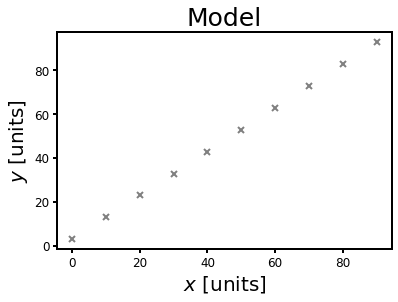

In [105]:
def model(x, a=1., b=0.):
    """
    y = ax + b
    """
    return a*x + b


# plot to visualize:
x = np.arange(0,100,10)
y = model(x, a=1., b=3.)

plt.plot(x, y, 'x', color='gray')
plt.xlabel(r'$x$ [units]', fontsize=20)
plt.ylabel(r'$y$ [units]', fontsize=20)
plt.title('Model', fontsize=25);

# 2. Data #

Write a function that generates some fake data according to the above model, as well as uncertainties. Generate some random x-values, and add a different normal-distributed random noise to each y-value.

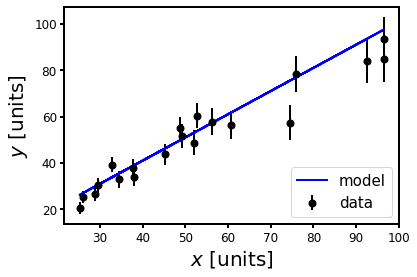

In [106]:
def generate_data(npoints=10, 
                  xmin=0., xmax=100., 
                  a=1., b=1.,
                  showplot=True,
                fractional_noise=0.1):
    """
    y_observed = y_theory + y_noise
    """
    x = np.random.random(npoints) * (xmax - xmin)
    y_theory = model(x, a=a, b=b)
 
    y_uncertainty = fractional_noise * y_theory # make uncertainty some fraction of theoretical y value.
    y_noise = np.random.randn(npoints) * y_uncertainty
    y_observed = y_theory + y_noise
    
    if showplot:
        f,ax = plt.subplots()
        ax.plot(x, y_theory, color='blue',lw=2, label='model')
        ax.errorbar(x, y_observed, yerr=y_uncertainty, marker='o', color='black', label='data',linestyle='none')
        ax.set_xlabel(r'$x$ [units]', fontsize=20)
        ax.set_ylabel(r'$y$ [units]', fontsize=20)
        ax.legend(loc='lower right',fontsize=15,frameon=True)
        plt.show()
    return x, y_observed, y_uncertainty

a_theory = 1.
b_theory = 1.
x, y_observed, y_uncertainty = generate_data(npoints=20, xmin=0., xmax=100., a=a_theory, b=b_theory)


# 3. Objective function #


In [107]:
def objective(params, x, y_observed, y_uncertainty, model_function):
    """
    params is [a, b]
    (y_observed - y_theory)^2 / y_uncertainty^2
    """
    
    return ((y_observed - model_function(x,params[0],params[1]))**2 / y_uncertainty**2).sum()
    
objective([1.5,0.3], x, y_observed, y_uncertainty, model)

560.831013115323

# 4. Optimize #
 Minimize the objective function to find best-fit values of parameters a and b.


In [108]:
guess = [1.,1.]
scipy.optimize.minimize(objective, guess, args=(x,y_observed,y_uncertainty, model))



      fun: 20.25567811008202
 hess_inv: array([[ 1.86430589e-03, -7.13244264e-02],
       [-7.13244264e-02,  3.17368730e+00]])
      jac: array([-2.38418579e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([0.95938674, 0.70175699])

Now let's plot the fit this arrived to:

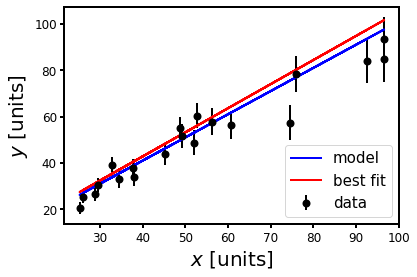

In [109]:
a_fit = result.x[0]
b_fit = result.x[1]

y_theory = x*a_theory + b_theory

f,ax = plt.subplots()
ax.errorbar(x, y_observed, yerr=y_uncertainty, marker='o', color='black', label='data',linestyle='none')
ax.plot(x, y_theory, color='blue',lw=2, label='model')
ax.plot(x, x*a_fit + b_fit, lw=2, color='red', label='best fit')
ax.set_xlabel(r'$x$ [units]', fontsize=20)
ax.set_ylabel(r'$y$ [units]', fontsize=20)
ax.legend(loc='lower right',fontsize=15,frameon=True)
plt.show()

Proclaim victory!

# 5. Put it all together #
